In [27]:
import pandas as pd

# Load the CSV without parsing dates or setting an index
predicted_prices = pd.read_csv("output.csv")
print(predicted_prices.head())
print(predicted_prices.info())


  Company        Date   Adj Close       Close        High         Low  \
0   APPLE  2024-09-06  220.577332  220.820007  225.240005  219.770004   
1   APPLE  2024-09-09  220.667221  220.910004  221.270004  216.710007   
2   APPLE  2024-09-10  219.868103  220.110001  221.479996  216.729996   
3   APPLE  2024-09-11  222.415298  222.660004  223.089996  217.889999   
4   APPLE  2024-09-12  222.525177  222.770004  223.550003  219.820007   

         Open    Volume  LSTM Predictions  RF Predictions  
0  223.949997  48423000        217.669837      221.968604  
1  220.820007  67180000        217.265124      221.819303  
2  218.919998  51591000        216.749693      221.818804  
3  221.460007  44587100        216.145360      220.822303  
4  222.500000  37498200        215.614873      221.378803  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0

In [28]:
# Skip metadata rows (e.g., the first row) and reset column headers
predicted_prices = pd.read_csv("output.csv")
print(predicted_prices.head())


  Company        Date   Adj Close       Close        High         Low  \
0   APPLE  2024-09-06  220.577332  220.820007  225.240005  219.770004   
1   APPLE  2024-09-09  220.667221  220.910004  221.270004  216.710007   
2   APPLE  2024-09-10  219.868103  220.110001  221.479996  216.729996   
3   APPLE  2024-09-11  222.415298  222.660004  223.089996  217.889999   
4   APPLE  2024-09-12  222.525177  222.770004  223.550003  219.820007   

         Open    Volume  LSTM Predictions  RF Predictions  
0  223.949997  48423000        217.669837      221.968604  
1  220.820007  67180000        217.265124      221.819303  
2  218.919998  51591000        216.749693      221.818804  
3  221.460007  44587100        216.145360      220.822303  
4  222.500000  37498200        215.614873      221.378803  


In [29]:
predicted_prices = pd.read_csv("output.csv", parse_dates=True)

print(predicted_prices.head())


  Company        Date   Adj Close       Close        High         Low  \
0   APPLE  2024-09-06  220.577332  220.820007  225.240005  219.770004   
1   APPLE  2024-09-09  220.667221  220.910004  221.270004  216.710007   
2   APPLE  2024-09-10  219.868103  220.110001  221.479996  216.729996   
3   APPLE  2024-09-11  222.415298  222.660004  223.089996  217.889999   
4   APPLE  2024-09-12  222.525177  222.770004  223.550003  219.820007   

         Open    Volume  LSTM Predictions  RF Predictions  
0  223.949997  48423000        217.669837      221.968604  
1  220.820007  67180000        217.265124      221.819303  
2  218.919998  51591000        216.749693      221.818804  
3  221.460007  44587100        216.145360      220.822303  
4  222.500000  37498200        215.614873      221.378803  


In [30]:
print(predicted_prices.columns)


Index(['Company', 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume', 'LSTM Predictions', 'RF Predictions'],
      dtype='object')


In [31]:
# Filter columns related to AAPL
aapl_columns = [col for col in predicted_prices.columns if "AAPL" in col]
print(aapl_columns)  # Verify column selection


[]


In [32]:
# Convert numeric columns for a specific stock (example: AAPL)
predicted_prices[aapl_columns] = predicted_prices[aapl_columns].apply(pd.to_numeric, errors='coerce')


In [33]:
# predicted_prices = predicted_prices.dropna(subset=aapl_columns)
print(predicted_prices.head())

  Company        Date   Adj Close       Close        High         Low  \
0   APPLE  2024-09-06  220.577332  220.820007  225.240005  219.770004   
1   APPLE  2024-09-09  220.667221  220.910004  221.270004  216.710007   
2   APPLE  2024-09-10  219.868103  220.110001  221.479996  216.729996   
3   APPLE  2024-09-11  222.415298  222.660004  223.089996  217.889999   
4   APPLE  2024-09-12  222.525177  222.770004  223.550003  219.820007   

         Open    Volume  LSTM Predictions  RF Predictions  
0  223.949997  48423000        217.669837      221.968604  
1  220.820007  67180000        217.265124      221.819303  
2  218.919998  51591000        216.749693      221.818804  
3  221.460007  44587100        216.145360      220.822303  
4  222.500000  37498200        215.614873      221.378803  


In [34]:
print(predicted_prices.dtypes)


Company              object
Date                 object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
LSTM Predictions    float64
RF Predictions      float64
dtype: object


In [35]:
print(predicted_prices.select_dtypes(include=[float, int]).head())


    Adj Close       Close        High         Low        Open    Volume  \
0  220.577332  220.820007  225.240005  219.770004  223.949997  48423000   
1  220.667221  220.910004  221.270004  216.710007  220.820007  67180000   
2  219.868103  220.110001  221.479996  216.729996  218.919998  51591000   
3  222.415298  222.660004  223.089996  217.889999  221.460007  44587100   
4  222.525177  222.770004  223.550003  219.820007  222.500000  37498200   

   LSTM Predictions  RF Predictions  
0        217.669837      221.968604  
1        217.265124      221.819303  
2        216.749693      221.818804  
3        216.145360      220.822303  
4        215.614873      221.378803  


In [36]:
# Select only the numeric columns (i.e., exclude non-numeric columns like 'Ticker' and 'Unnamed')
numeric_columns = predicted_prices.select_dtypes(include=[float, int])


# Calculate percentage change and drop rows with NaN values (e.g., due to missing data or division by zero)
predicted_returns = numeric_columns.pct_change().dropna().values


In [37]:
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

# Select numeric columns from predicted_prices
numeric_columns = predicted_prices.select_dtypes(include=[float, int])

# Calculate expected returns (mu) using numeric_columns
mu = expected_returns.mean_historical_return(numeric_columns)

# Calculate the covariance matrix using numeric_columns
cov_matrix = risk_models.CovarianceShrinkage(numeric_columns).ledoit_wolf()

# Print results
print(mu)
print(cov_matrix)



Adj Close          -0.687390
Close              -0.687565
High               -0.681853
Low                -0.687019
Open               -0.681401
Volume              0.705318
LSTM Predictions   -0.667274
RF Predictions     -0.659896
dtype: float64
                  Adj Close      Close       High        Low       Open  \
Adj Close         11.529186   3.583742   3.700983   3.592621   3.710765   
Close              3.583742  11.538908   3.706097   3.597545   3.715939   
High               3.700983   3.706097  11.818986   3.732199   3.887569   
Low                3.592621   3.597545   3.732199  11.593592   3.769001   
Open               3.710765   3.715939   3.887569   3.769001  11.898668   
Volume            -4.358384  -4.359139  -3.875882  -4.612131  -4.068751   
LSTM Predictions   3.772440   3.777887   3.939908   3.820331   3.982172   
RF Predictions     4.024534   4.030260   4.222668   4.092225   4.285418   

                      Volume  LSTM Predictions  RF Predictions  
Adj Close   

In [38]:
print(mu)


Adj Close          -0.687390
Close              -0.687565
High               -0.681853
Low                -0.687019
Open               -0.681401
Volume              0.705318
LSTM Predictions   -0.667274
RF Predictions     -0.659896
dtype: float64


In [39]:
mu = mu * 252  # Assuming 252 trading days in a year for annualization


In [40]:
mu = mu[mu > 0]
cov_matrix = cov_matrix.loc[mu.index, mu.index]


In [41]:
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe()  # Maximize the Sharpe ratio
cleaned_weights = ef.clean_weights()  # Get rounded weights
print("Optimized Weights:", cleaned_weights)

# Performance metrics
performance = ef.portfolio_performance(verbose=True)


Optimized Weights: OrderedDict({'Volume': 1.0})
Expected annual return: 17774.0%
Annual volatility: 1014.3%
Sharpe Ratio: 17.52


In [42]:
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe(risk_free_rate=0.01)  # Example: 1% risk-free rate


In [43]:
from pypfopt import EfficientFrontier

# Use the Efficient Frontier to maximize the Sharpe ratio
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

In [44]:
# Portfolio Performance
performance = ef.portfolio_performance(verbose=True)
print("Optimized Weights:", cleaned_weights)

# Step 5: Visualize the Portfolio Allocation
import matplotlib.pyplot as plt

Expected annual return: 17774.0%
Annual volatility: 1014.3%
Sharpe Ratio: 17.52
Optimized Weights: OrderedDict({'Volume': 1.0})


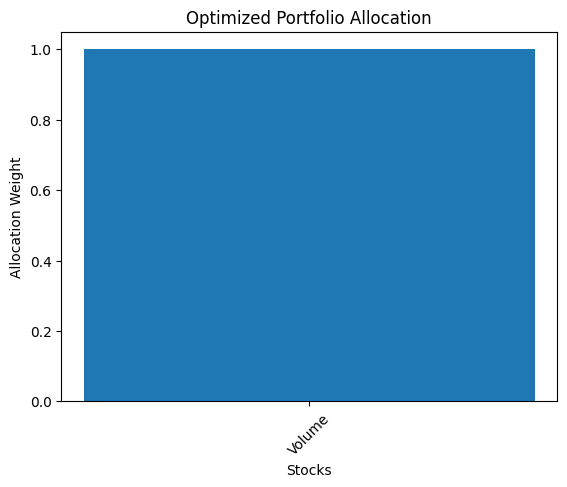

In [45]:
# Bar plot of weights
plt.bar(cleaned_weights.keys(), cleaned_weights.values())
plt.title("Optimized Portfolio Allocation")
plt.ylabel("Allocation Weight")
plt.xlabel("Stocks")
plt.xticks(rotation=45)
plt.show()

In [46]:
from scipy.optimize import minimize
import numpy as np
from pypfopt import objective_functions

# Custom Sortino ratio function to minimize (negative Sortino ratio)
def negative_sortino(weights, mu, cov_matrix):
    weights = np.array(weights)
    portfolio_return = np.dot(weights, mu)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Negative to minimize

# Constraint: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights
bounds = [(0, 1) for _ in range(len(mu))]

# Initial guess (equal weights)
initial_guess = np.array([1 / len(mu) for _ in range(len(mu))])

# Perform the optimization
result = minimize(
    negative_sortino,
    initial_guess,
    args=(mu, cov_matrix),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)

# Extract the optimized weights
optimized_weights = result.x
print("Optimized Weights:", optimized_weights)


Optimized Weights: [1.]
